In [1]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
country_original = pd.read_csv('/content/drive/MyDrive/colab/country.csv')
country = country_original.copy()

In [4]:
countries_selected = country.iloc[:,1:]

In [5]:
scaler = StandardScaler()

In [6]:
countries = scaler.fit_transform(countries_selected)
countries_scaled = pd.DataFrame(countries, columns=countries_selected.columns )

In [7]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


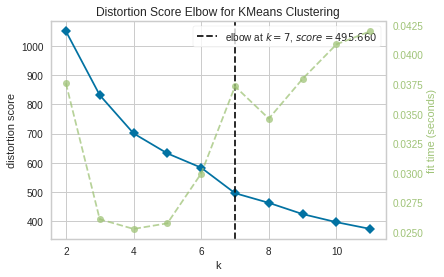

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(countries_scaled) 
visualizer.show()

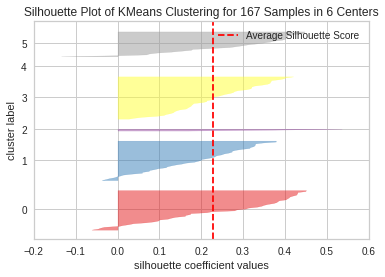

In [9]:
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(countries_scaled) 
visualizer.show()

In [10]:
model = KMeans(7)
clusters = model.fit_predict(countries_scaled)

In [11]:
clusters

array([0, 1, 3, 0, 1, 3, 1, 5, 5, 3, 1, 4, 3, 1, 1, 5, 1, 0, 1, 3, 1, 3,
       1, 4, 1, 0, 0, 1, 0, 5, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 1, 1,
       5, 1, 1, 3, 1, 3, 3, 1, 1, 5, 5, 3, 0, 1, 5, 3, 5, 1, 3, 0, 0, 1,
       0, 1, 5, 3, 3, 3, 3, 5, 5, 5, 1, 5, 1, 3, 3, 0, 4, 1, 3, 1, 1, 0,
       0, 1, 1, 2, 1, 3, 0, 1, 1, 0, 2, 3, 1, 1, 1, 3, 1, 1, 0, 3, 3, 3,
       5, 5, 0, 6, 5, 4, 3, 1, 1, 1, 3, 1, 5, 4, 1, 3, 0, 1, 4, 0, 1, 1,
       0, 2, 1, 5, 1, 3, 1, 5, 3, 1, 3, 1, 5, 5, 3, 0, 1, 3, 0, 3, 1, 1,
       3, 0, 1, 4, 5, 5, 1, 3, 3, 3, 1, 3, 0], dtype=int32)

In [12]:
country['cluster'] = clusters

In [13]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3


In [14]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [15]:
from yellowbrick.features import PCA

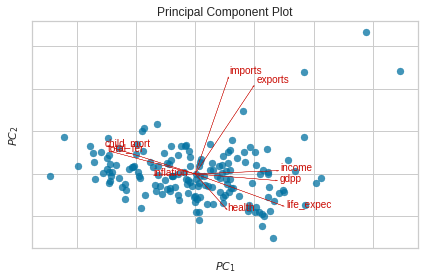

In [16]:
visualizer = PCA(proj_features=True)
visualizer.fit_transform(countries_scaled)
visualizer.show()


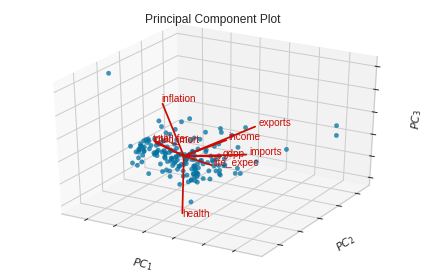

In [17]:
visualizer = PCA(proj_features=True, projection=3)
visualizer.fit_transform(countries_scaled)
visualizer.show()

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca.fit(countries_scaled)


PCA()

In [20]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [21]:
pca.n_components_

9

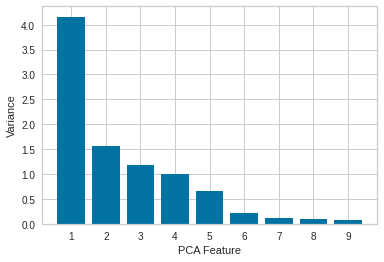

In [22]:
plt.bar(range(1, 10), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.xticks(range(1, 10))
plt.show()

In [23]:
pca.explained_variance_ * 10

array([41.60570175, 15.55661648, 11.77433803, 10.00777241,  6.64598661,
        2.24927995,  1.14122102,  0.88847377,  0.67277868])

In [24]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

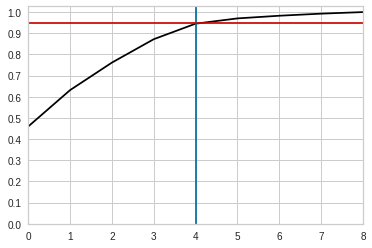

In [25]:
plt.plot( np.cumsum(pca.explained_variance_ratio_), color='black')
plt.xlim(0,8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4, c='b')
plt.axhline(0.95, c='r')
plt.show()

In [26]:
pca = PCA(n_components=5)
countries_pca = pca.fit_transform(countries_scaled)

In [27]:
df_countries_pca = pd.DataFrame(countries_pca, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4'])

In [28]:
df_countries_pca

,PC0,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


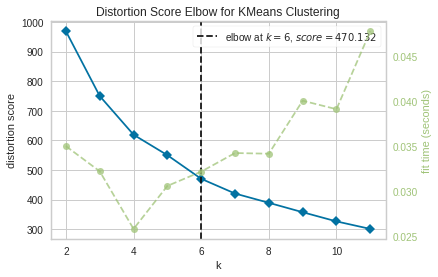

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df_countries_pca) 
visualizer.show()

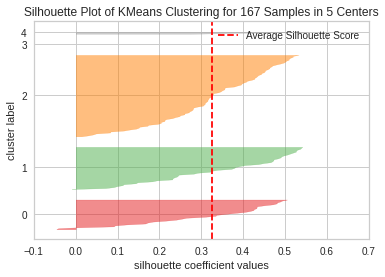

In [30]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_countries_pca) 
visualizer.show()

#### DBSCAN

In [44]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [33]:
neigh = NearestNeighbors(n_neighbors=2)

In [34]:
nbrs = neigh.fit(df_countries_pca)

In [35]:
distances, indices = nbrs.kneighbors(df_countries_pca)

In [36]:
distances

array([[0.        , 0.56161672],
       [0.        , 0.48058804],
       [0.        , 0.54504832],
       [0.        , 1.5029757 ],
       [0.        , 0.31732806],
       [0.        , 1.10248979],
       [0.        , 0.49196771],
       [0.        , 0.73461712],
       [0.        , 0.62543457],
       [0.        , 0.56881127],
       [0.        , 0.75993621],
       [0.        , 1.05999461],
       [0.        , 0.64979903],
       [0.        , 0.45641614],
       [0.        , 0.94700942],
       [0.        , 0.75488182],
       [0.        , 0.56166159],
       [0.        , 0.47414921],
       [0.        , 0.42126498],
       [0.        , 0.62323359],
       [0.        , 0.56158354],
       [0.        , 0.8516887 ],
       [0.        , 0.77980594],
       [0.        , 0.53221525],
       [0.        , 0.37474091],
       [0.        , 0.65004513],
       [0.        , 0.9873331 ],
       [0.        , 0.45918654],
       [0.        , 0.47414921],
       [0.        , 0.46478497],
       [0.

In [38]:
distances = distances[:,1]

In [39]:
distances

array([0.56161672, 0.48058804, 0.54504832, 1.5029757 , 0.31732806,
       1.10248979, 0.49196771, 0.73461712, 0.62543457, 0.56881127,
       0.75993621, 1.05999461, 0.64979903, 0.45641614, 0.94700942,
       0.75488182, 0.56166159, 0.47414921, 0.42126498, 0.62323359,
       0.56158354, 0.8516887 , 0.77980594, 0.53221525, 0.37474091,
       0.65004513, 0.9873331 , 0.45918654, 0.47414921, 0.46478497,
       0.56175932, 0.80084255, 0.59165683, 0.70255372, 0.28280629,
       0.67186604, 0.38706364, 1.35248331, 1.19444551, 0.58363072,
       0.48801586, 0.23702891, 0.60500071, 0.61275845, 0.62543457,
       0.63247829, 0.70773232, 0.62544972, 0.46795571, 1.95523973,
       0.37382154, 0.54295547, 0.42126498, 0.53910043, 0.46478497,
       1.38399616, 0.44944848, 0.64612598, 0.58310888, 0.92840838,
       0.47251934, 0.46795571, 0.63247829, 0.35667694, 0.66997306,
       0.54733908, 1.69282228, 0.63453257, 0.7319791 , 0.62544972,
       0.89812359, 0.45894717, 1.17089867, 1.324552  , 0.77522

In [40]:
distances = np.sort(distances)

In [41]:
distances

array([0.23702891, 0.23702891, 0.28280629, 0.28280629, 0.31732806,
       0.31732806, 0.32233338, 0.32233338, 0.35667694, 0.35667694,
       0.37382154, 0.37382154, 0.37474091, 0.38142041, 0.38706364,
       0.38706364, 0.38727952, 0.39195629, 0.41783393, 0.42126498,
       0.42126498, 0.4253641 , 0.44152633, 0.44152633, 0.44451415,
       0.44944848, 0.45641614, 0.45894717, 0.45894717, 0.45918654,
       0.45918654, 0.46478497, 0.46478497, 0.46795571, 0.46795571,
       0.47251934, 0.47414921, 0.47414921, 0.48058804, 0.48379005,
       0.48801586, 0.48801586, 0.49196771, 0.49196771, 0.50059774,
       0.5133044 , 0.51428087, 0.52106677, 0.53221525, 0.53221525,
       0.53248035, 0.53248035, 0.53910043, 0.53910043, 0.54295547,
       0.54295547, 0.54400266, 0.54504832, 0.54504832, 0.54733908,
       0.55709582, 0.56158354, 0.56158354, 0.56161672, 0.56166159,
       0.56175932, 0.56458612, 0.56458612, 0.56570833, 0.56881127,
       0.5764668 , 0.58310888, 0.58363072, 0.58919236, 0.58919

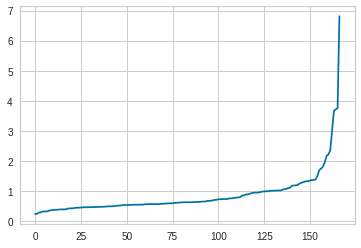

In [42]:
plt.plot(distances)

In [43]:
epsilon = 1.2
min_samples = 10

In [45]:
db = DBSCAN(eps=epsilon, min_samples=min_samples)

In [46]:
db.fit(df_countries_pca)

DBSCAN(eps=1.2, min_samples=10)

In [47]:
db.labels_

array([ 1,  0,  0, -1,  0,  0,  0,  2,  2,  0,  0, -1,  0,  0,  0, -1,  0,
        1,  0,  0,  0,  0,  0, -1,  0,  1, -1,  0,  1,  2,  0, -1,  1,  0,
        0,  0,  1, -1, -1,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0, -1, -1,
        0,  0,  2,  2, -1,  1,  0,  2,  1,  2,  0,  0,  1,  1,  0, -1,  0,
        2,  0,  0,  0,  0, -1,  0,  2,  0,  2,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  1,  1,  0,  0,  1, -1, -1,  0, -1,
       -1, -1,  0,  0,  1, -1,  0,  0, -1,  2,  1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  2, -1,  0,  0, -1,  0, -1,  1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  2,  0,  0, -1,  0,  2, -1,  0,  1,  0, -1,  1,  0,  0,
        0, -1,  1,  0, -1,  2, -1,  0,  0,  0, -1,  0, -1,  1])

In [48]:
country['cluster_dbscan'] = db.labels_

In [49]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3,-1


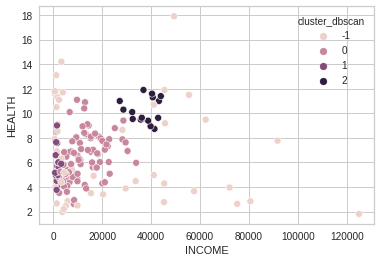

In [50]:
sns.scatterplot(country['income'], country['health'], hue=country['cluster_dbscan'])
plt.xlabel('INCOME')
plt.ylabel('HEALTH')
plt.show()

In [52]:
country.groupby('cluster_dbscan').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
cluster_dbscan,,,,,,,,,,
-1,52.693333,53.160422,6.822667,54.823687,25642.244444,13.319533,68.348889,3.418222,19216.488889,2.533333
0,22.290588,39.986824,6.418000,47.064706,12648.117647,6.250047,72.709412,2.298941,7349.776471,1.682353
1,98.057143,25.704762,5.817143,39.938095,1770.095238,6.999762,58.604762,5.502857,749.571429,0.285714
2,4.125000,33.393750,10.219375,32.775000,37312.500000,1.371125,81.006250,1.720000,41237.500000,5.000000


In [55]:
country[country['cluster_dbscan']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0,1
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,0,1
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,0,1
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,0,1
56,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562,0,1
59,Ghana,74.7,29.5,5.22,45.9,3060,16.600,62.2,4.27,1310,3,1
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0,1


In [58]:
country[country['cluster_dbscan']==-1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dbscan
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0,-1
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,4,-1
15,Belgium,4.5,76.400,10.70,74.7000,41100,1.880,80.0,1.86,44400,5,-1
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.700,77.1,1.84,35300,4,-1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0,-1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0,-1
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,0,-1
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740,3,-1
49,Equatorial Guinea,111.0,85.800,4.48,58.9000,33700,24.900,60.9,5.21,17100,3,-1
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482,3,-1


In [59]:
dict_categories = {
    -1:'Outlier',
     0:'Em desenvolvimento',
     1:'Precisa de ajuda',
     2:'Ricos'
}

In [60]:
country['cluster_label'] = country['cluster_dbscan'].map(dict_categories)

In [61]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_dbscan,cluster_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,Precisa de ajuda
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,Em desenvolvimento
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,Em desenvolvimento
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,-1,Outlier
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,Em desenvolvimento


In [62]:
import plotly.express as px
import plotly.graph_objects as go

In [66]:
px.choropleth(data_frame=country, locationmode='country names', 
              locations='country', color=country['cluster_label'],
              color_discrete_map={'Precisa de ajuda':'red',
                                  'Ricos':'green',
                                  'Em desenvolvimento':'yellow'})